In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
Maliha=pd.read_csv('train (1).csv')
Maliha

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [4]:

Maliha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
Maliha.isnull().sum().sum()

np.int64(11)

In [6]:
Maliha.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [7]:
Maliha.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [8]:
duplicates_mask = Maliha.duplicated()
duplicates_mask.sum()

np.int64(0)

In [9]:
Maliha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [10]:
Maliha['Postal Code'].mean()

np.float64(55273.322402696904)

In [11]:
Maliha['Postal Code'] = Maliha['Postal Code'].fillna(Maliha['Postal Code'].mean())

In [12]:
Maliha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [13]:
for i in Maliha.columns:
    if(Maliha[i].dtype == 'int64' and (Maliha[i]==0).sum()!=0):
        print(i , Maliha[i].dtype , (Maliha[i]==0).sum())

In [14]:
for i in Maliha.columns:
    if(Maliha[i].dtype == 'float64' and (Maliha[i]==0).sum()!=0):
        print(i , Maliha[i].dtype , (Maliha[i]==0).sum())

In [15]:
Maliha.drop(['Row ID','Order ID','Customer Name','Customer ID','Product ID','Country','City','State','Order Date','Ship Date','Product Name'] , axis =1, inplace=True)
Maliha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9800 non-null   object 
 1   Segment       9800 non-null   object 
 2   Postal Code   9800 non-null   float64
 3   Region        9800 non-null   object 
 4   Category      9800 non-null   object 
 5   Sub-Category  9800 non-null   object 
 6   Sales         9800 non-null   float64
dtypes: float64(2), object(5)
memory usage: 536.1+ KB


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Maliha.columns:
    if(Maliha[i].dtype == 'object'):
        Maliha[i] = le.fit_transform(Maliha[i])
        print(i , Maliha[i].value_counts())

Ship Mode Ship Mode
3    5859
2    1902
0    1501
1     538
Name: count, dtype: int64
Segment Segment
0    5101
1    2953
2    1746
Name: count, dtype: int64
Region Region
3    3140
1    2785
0    2277
2    1598
Name: count, dtype: int64
Category Category
1    5909
0    2078
2    1813
Name: count, dtype: int64
Sub-Category Sub-Category
3     1492
12    1338
9      931
13     876
14     832
2      785
0      756
5      607
1      459
10     357
16     314
7      248
4      226
8      214
15     184
11     115
6       66
Name: count, dtype: int64


In [17]:
Maliha.isna().sum().sum()

np.int64(0)

In [18]:
Maliha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9800 non-null   int64  
 1   Segment       9800 non-null   int64  
 2   Postal Code   9800 non-null   float64
 3   Region        9800 non-null   int64  
 4   Category      9800 non-null   int64  
 5   Sub-Category  9800 non-null   int64  
 6   Sales         9800 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 536.1 KB


In [19]:
Maliha['Category'].value_counts()

Category
1    5909
0    2078
2    1813
Name: count, dtype: int64

In [20]:
X = Maliha.drop('Category', axis=1)
Y = Maliha['Category']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9800 non-null   int64  
 1   Segment       9800 non-null   int64  
 2   Postal Code   9800 non-null   float64
 3   Region        9800 non-null   int64  
 4   Sub-Category  9800 non-null   int64  
 5   Sales         9800 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 459.5 KB


In [21]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 9800 entries, 0 to 9799
Series name: Category
Non-Null Count  Dtype
--------------  -----
9800 non-null   int64
dtypes: int64(1)
memory usage: 76.7 KB


In [22]:
from sklearn.model_selection import train_test_split
X_TRAIN , X_TEST , Y_TRAIN, Y_TEST = train_test_split(X,Y, test_size =
0.25, random_state=25)
print("Size of Train X = " , len(X_TRAIN))
print("Size of Train Y = " , len(Y_TRAIN))
print("Size of Test X = " , len(X_TEST))
print("Size of Test Y = " , len(Y_TEST))

Size of Train X =  7350
Size of Train Y =  7350
Size of Test X =  2450
Size of Test Y =  2450


In [23]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# fit the regressor with X and Y data 
gnb.fit(X_TRAIN, Y_TRAIN)

GaussianNB()

In [24]:
# TRAINING

In [25]:
# accuracy for prediction on training data
training_data_prediction = gnb.predict(X_TRAIN)
print(training_data_prediction)

[1 1 1 ... 1 1 1]


In [26]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TRAIN, training_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.6152380952380953


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_TRAIN, training_data_prediction)

array([[  59, 1371,  115],
       [  19, 4352,   86],
       [  66, 1171,  111]])

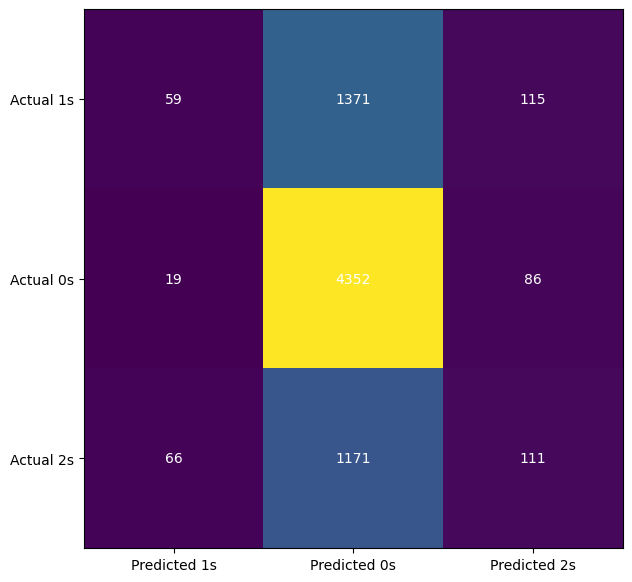

In [28]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TRAIN, training_data_prediction)
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2), ticklabels=('Predicted 1s','Predicted 0s',
'Predicted 2s'))
ax.yaxis.set(ticks=(0,1,2), ticklabels=('Actual 1s','Actual 0s', 
'Actual 2s'))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', 
color='white')
plt.show()

In [29]:
report = classification_report(Y_TRAIN, training_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.41      0.04      0.07      1545
           1       0.63      0.98      0.77      4457
           2       0.36      0.08      0.13      1348

    accuracy                           0.62      7350
   macro avg       0.47      0.37      0.32      7350
weighted avg       0.53      0.62      0.50      7350



# TESTING

In [30]:
testing_data_prediction = gnb.predict(X_TEST)
print(testing_data_prediction)

[1 1 1 ... 1 1 1]


In [31]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TEST, testing_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.6


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_TEST, testing_data_prediction)

array([[  20,  467,   46],
       [   9, 1414,   29],
       [  22,  407,   36]])

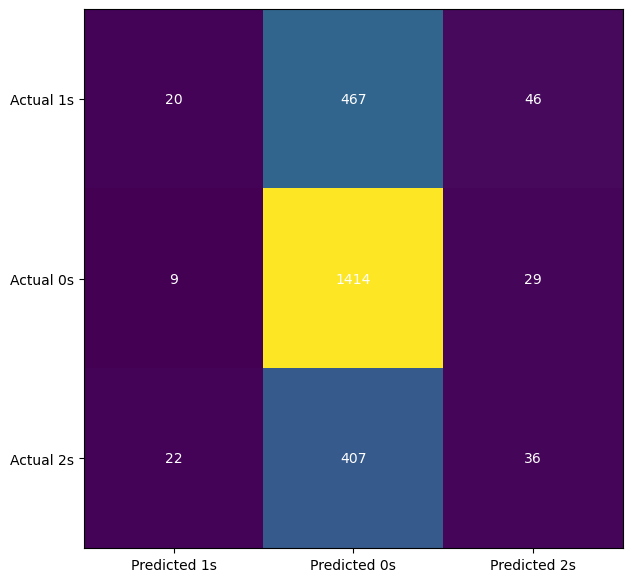

In [33]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TEST, testing_data_prediction)
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2), ticklabels=('Predicted 1s','Predicted 0s',
'Predicted 2s'))
ax.yaxis.set(ticks=(0,1,2), ticklabels=('Actual 1s','Actual 0s', 
'Actual 2s'))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', 
color='white')
plt.show()

In [34]:
report = classification_report(Y_TEST, testing_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.39      0.04      0.07       533
           1       0.62      0.97      0.76      1452
           2       0.32      0.08      0.12       465

    accuracy                           0.60      2450
   macro avg       0.44      0.36      0.32      2450
weighted avg       0.51      0.60      0.49      2450



In [35]:
from sklearn.linear_model import LogisticRegression
Maliha= LogisticRegression(solver='liblinear', random_state=10)
Maliha .fit(X_TRAIN, Y_TRAIN)

LogisticRegression(random_state=10, solver='liblinear')

In [36]:
Maliha .classes_

array([0, 1, 2])

In [37]:
Maliha.intercept_

array([-0.01964769,  0.0024967 , -0.02873828])

In [38]:
Maliha.coef_

array([[-4.55707633e-02, -1.35124103e-02, -1.14400913e-05,
        -1.16549832e-02, -5.25327540e-02,  1.96264791e-04],
       [ 6.25366803e-03,  1.73802706e-03,  8.00499755e-06,
         1.28806259e-03,  1.57189199e-02, -1.59036955e-03],
       [-6.54550079e-02, -1.80738031e-02, -1.13945644e-05,
        -1.74842788e-02, -8.69261832e-02,  6.23845366e-04]])

# TRAINING

In [39]:
# accuracy for prediction on training data
training_data_prediction =Maliha.predict(X_TRAIN)
print(training_data_prediction)

[1 1 1 ... 1 1 1]


In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TRAIN, training_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.6136054421768707


In [41]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_TRAIN, training_data_prediction)

array([[  24, 1380,  141],
       [  17, 4315,  125],
       [  20, 1157,  171]])

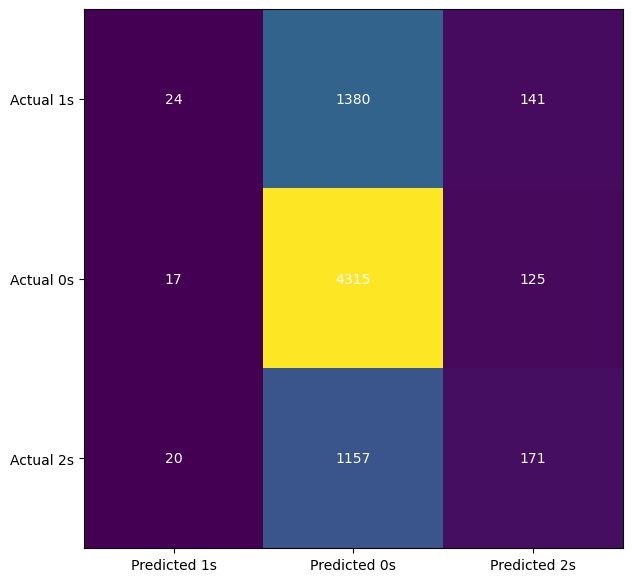

In [42]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TRAIN, training_data_prediction)
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2), ticklabels=('Predicted 1s','Predicted 0s',
'Predicted 2s'))
ax.yaxis.set(ticks=(0,1,2), ticklabels=('Actual 1s','Actual 0s', 
'Actual 2s'))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', 
color='white')
plt.show()

In [43]:
report = classification_report(Y_TRAIN, training_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.39      0.02      0.03      1545
           1       0.63      0.97      0.76      4457
           2       0.39      0.13      0.19      1348

    accuracy                           0.61      7350
   macro avg       0.47      0.37      0.33      7350
weighted avg       0.54      0.61      0.50      7350



# TESTING

In [44]:
# accuracy for prediction on training data
testing_data_prediction = Maliha.predict(X_TEST)
print(testing_data_prediction)

[1 1 1 ... 1 1 2]


In [45]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TEST, testing_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.5983673469387755


In [46]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_TEST, testing_data_prediction)

array([[   9,  468,   56],
       [   6, 1409,   37],
       [   8,  409,   48]])

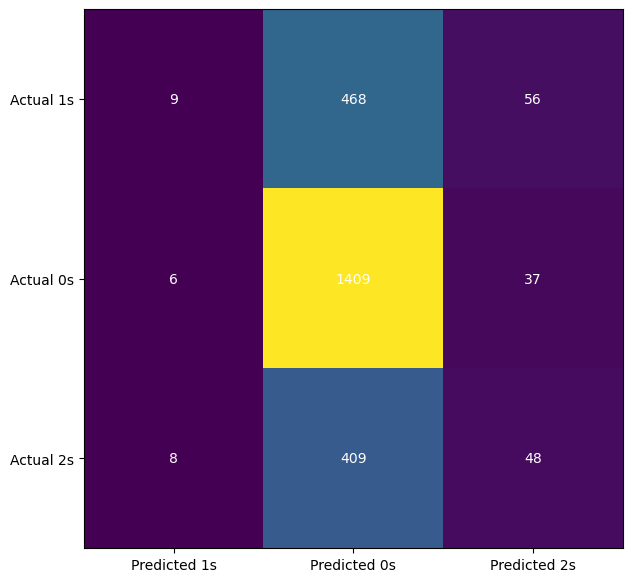

In [47]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TEST, testing_data_prediction)
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2), ticklabels=('Predicted 1s','Predicted 0s',
'Predicted 2s'))
ax.yaxis.set(ticks=(0,1,2), ticklabels=('Actual 1s','Actual 0s', 
'Actual 2s'))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', 
color='white')
plt.show()

In [48]:
report = classification_report(Y_TEST, testing_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.39      0.02      0.03       533
           1       0.62      0.97      0.75      1452
           2       0.34      0.10      0.16       465

    accuracy                           0.60      2450
   macro avg       0.45      0.36      0.31      2450
weighted avg       0.52      0.60      0.48      2450



In [49]:
# from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# initialize decision tree classifier
dtree = DecisionTreeClassifier(random_state=30)
# train the classifier
dtree.fit(X_TRAIN, Y_TRAIN)


DecisionTreeClassifier(random_state=30)

# TRAINING

In [50]:
# accuracy for prediction on training data
training_data_prediction = dtree.predict(X_TRAIN)
print(training_data_prediction)

[1 0 1 ... 2 1 1]


In [51]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TRAIN, training_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  1.0


In [52]:
confusion_matrix(Y_TRAIN, training_data_prediction)

array([[1545,    0,    0],
       [   0, 4457,    0],
       [   0,    0, 1348]])

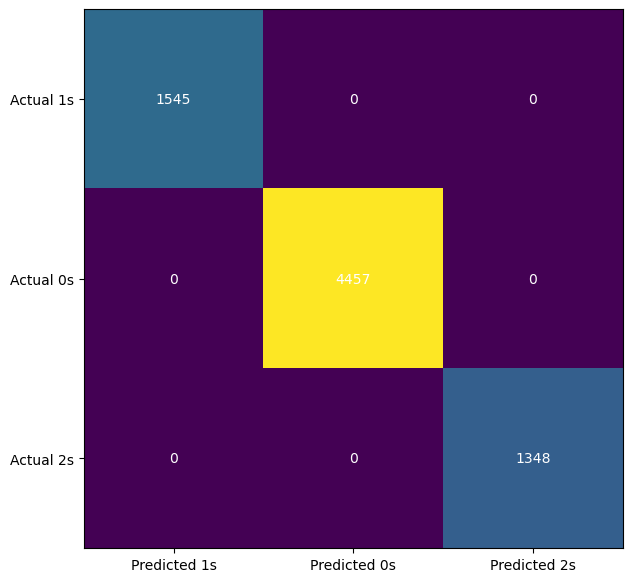

In [53]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TRAIN, training_data_prediction)
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2), ticklabels=('Predicted 1s','Predicted 0s',
'Predicted 2s'))
ax.yaxis.set(ticks=(0,1,2), ticklabels=('Actual 1s','Actual 0s', 
'Actual 2s'))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', 
color='white')
plt.show()

In [54]:
report = classification_report(Y_TRAIN, training_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1545
           1       1.00      1.00      1.00      4457
           2       1.00      1.00      1.00      1348

    accuracy                           1.00      7350
   macro avg       1.00      1.00      1.00      7350
weighted avg       1.00      1.00      1.00      7350



# TESTING

In [55]:
# accuracy for prediction on training data
testing_data_prediction = dtree.predict(X_TEST)
print(testing_data_prediction)

[1 1 1 ... 1 1 2]


In [56]:
accuracy = accuracy_score(Y_TEST, testing_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  1.0


In [57]:
confusion_matrix(Y_TEST, testing_data_prediction)

array([[ 533,    0,    0],
       [   0, 1452,    0],
       [   0,    0,  465]])

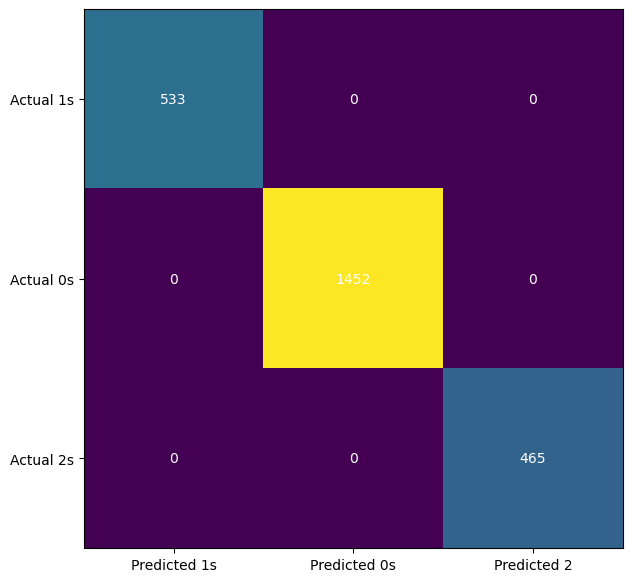

In [58]:
import matplotlib.pyplot as plt
cm =confusion_matrix(Y_TEST, testing_data_prediction)
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2), ticklabels=('Predicted 1s','Predicted 0s',
'Predicted 2'))
ax.yaxis.set(ticks=(0,1,2), ticklabels=('Actual 1s','Actual 0s', 
'Actual 2s'))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', 
color='white')
plt.show()

In [59]:
report = classification_report(Y_TEST, testing_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       533
           1       1.00      1.00      1.00      1452
           2       1.00      1.00      1.00       465

    accuracy                           1.00      2450
   macro avg       1.00      1.00      1.00      2450
weighted avg       1.00      1.00      1.00      2450



In [60]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=7, random_state=15)
# train the classifier
rf_model.fit(X_TRAIN, Y_TRAIN)

RandomForestClassifier(n_estimators=7, random_state=15)

# TRAINING

In [61]:
# accuracy for prediction on training data
training_data_prediction = rf_model.predict(X_TRAIN)
training_data_prediction

array([1, 0, 1, ..., 2, 1, 1])

In [62]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TRAIN, training_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.9989115646258503


In [63]:
confusion_matrix(Y_TRAIN, training_data_prediction)

array([[1544,    0,    1],
       [   0, 4457,    0],
       [   1,    6, 1341]])

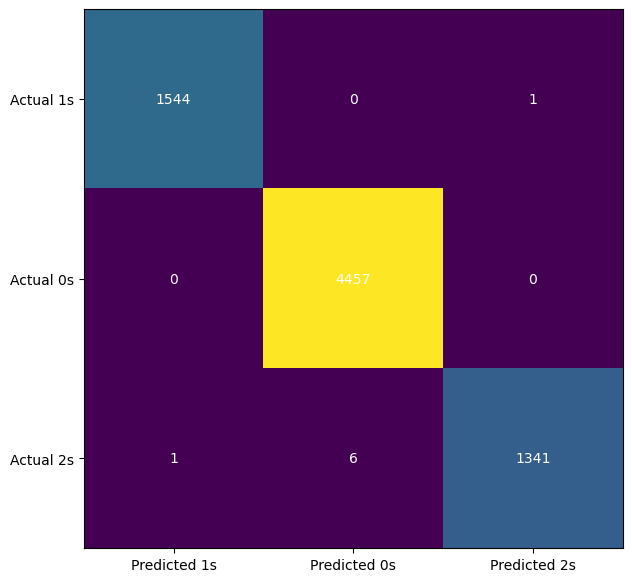

In [64]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TRAIN, training_data_prediction)
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2), ticklabels=('Predicted 1s','Predicted 0s',
'Predicted 2s'))
ax.yaxis.set(ticks=(0,1,2), ticklabels=('Actual 1s','Actual 0s', 
'Actual 2s'))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', 
color='white')
plt.show()

In [65]:
report = classification_report(Y_TRAIN, training_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1545
           1       1.00      1.00      1.00      4457
           2       1.00      0.99      1.00      1348

    accuracy                           1.00      7350
   macro avg       1.00      1.00      1.00      7350
weighted avg       1.00      1.00      1.00      7350



# TESTING

In [66]:
# accuracy for prediction on training data
testing_data_prediction = rf_model.predict(X_TEST)
print(testing_data_prediction)

[1 1 1 ... 1 1 2]


In [67]:
accuracy = accuracy_score(Y_TEST, testing_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.9840816326530613


In [68]:
confusion_matrix(Y_TEST, testing_data_prediction)

array([[ 530,    3,    0],
       [   5, 1443,    4],
       [   1,   26,  438]])

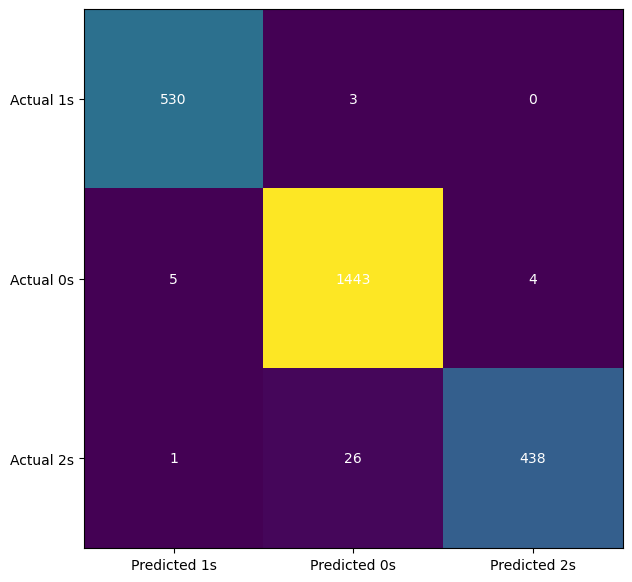

In [69]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TEST, testing_data_prediction)
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2), ticklabels=('Predicted 1s','Predicted 0s',
'Predicted 2s'))
ax.yaxis.set(ticks=(0,1,2), ticklabels=('Actual 1s','Actual 0s', 
'Actual 2s'))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', 
color='white')
plt.show()

In [70]:
report = classification_report(Y_TEST, testing_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       533
           1       0.98      0.99      0.99      1452
           2       0.99      0.94      0.97       465

    accuracy                           0.98      2450
   macro avg       0.99      0.98      0.98      2450
weighted avg       0.98      0.98      0.98      2450



# SVM

In [1]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
Maliha = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
Maliha .fit(X_TRAIN, Y_TRAIN)

NameError: name 'X_TRAIN' is not defined

# TRAINING

In [ ]:
# accuracy for prediction on training data
training_data_prediction = Maliha .predict(X_TRAIN)
print(training_data_prediction)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TRAIN, training_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_TRAIN, training_data_prediction)

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TRAIN, training_data_prediction)
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2), ticklabels=('Predicted 1s','Predicted 0s',
'Predicted 2s'))
ax.yaxis.set(ticks=(0,1,2), ticklabels=('Actual 1s','Actual 0s', 
'Actual 2s'))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', 
color='white')
plt.show()

In [ ]:
report = classification_report(Y_TRAIN, training_data_prediction)
print(report)

 TESTING

In [ ]:
# accuracy for prediction on training data
testing_data_prediction =Maliha .predict(X_TEST)
print(testing_data_prediction)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TEST, testing_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_TEST, testing_data_prediction)

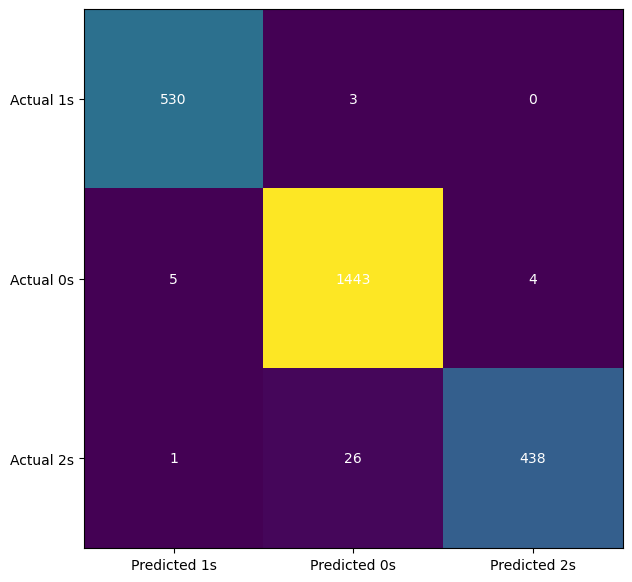

In [105]:
import matplotlib.pyplot as plt
cm =confusion_matrix(Y_TEST, testing_data_prediction)
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2), ticklabels=('Predicted 1s','Predicted 0s',
'Predicted 2s'))
ax.yaxis.set(ticks=(0,1,2), ticklabels=('Actual 1s','Actual 0s', 
'Actual 2s'))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', 
color='white')
plt.show()

In [ ]:
report = classification_report(Y_TEST, testing_data_prediction)
print(report)


Hyperparmater tuning using GridSearchCV
GridSearchCV is a scikit-learn function that automates the 
hyperparameter tuning process¶
and helps to find the best hyperparameters for a given machine 
learning model.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter to fine tune
param_grid = {
 'max_depth': range(1, 10, 1),
 'min_samples_leaf': range(1, 20, 2),
 'min_samples_split': range(3, 20, 2),
 'criterion': ["entropy", "gini"]
}
# Decision tree classifier
tree = DecisionTreeClassifier(random_state=5)
# GridSearchCV
# CV=Cross Validation
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, 
cv=5, verbose=True)
grid_search.fit(X_TRAIN, Y_TRAIN)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


In [ ]:
# Best score and estimator
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)
# accuracy for prediction on training data
training_data_prediction = grid_search.predict(X_TRAIN)
training_data_prediction
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TRAIN, training_data_prediction)
print("The Accuracy of Prediction is ", accuracy)
confusion_matrix(Y_TRAIN, training_data_prediction)
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TRAIN, training_data_prediction)
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2), ticklabels=('Predicted 1s','Predicted 0s',
'Predicted 2s'))
ax.yaxis.set(ticks=(0,1,2), ticklabels=('Actual 1s','Actual 0s', 
'Actual 2s'))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', 
color='white')
plt.show()
report = classification_report(Y_TRAIN, training_data_prediction)
print(report)

In [ ]:
# accuracy for prediction on training data
testing_data_prediction = grid_search.predict(X_TEST)
print(testing_data_prediction)
accuracy = accuracy_score(Y_TEST, testing_data_prediction)
print("The Accuracy of Prediction is ", accuracy)
confusion_matrix(Y_TEST, testing_data_prediction)
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TEST, testing_data_prediction)
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2), ticklabels=('Predicted 0s','Predicted 2s',
'Predicted 3s'))
ax.yaxis.set(ticks=(0,1,2), ticklabels=('Actual 0s','Actual 2s', 
'Actual 3s'))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', 
color='white')
plt.show()
report = classification_report(Y_TEST, testing_data_prediction)
print(report)